<a href="https://www.kaggle.com/code/sadikemir/decisiontree-randomforest-xgb-predict?scriptVersionId=234626092" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack/Heart Attack Data Set.csv


In [2]:
df=pd.read_csv('/kaggle/input/heart-attack/Heart Attack Data Set.csv')

In [3]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [4]:
y=df['target']
x=df.drop('target',axis=1)

In [5]:
tree=DecisionTreeClassifier()
model=tree.fit(x,y)

In [6]:
model.score(x,y)
#model.predict()

1.0

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,train_size=0.77)
tree=DecisionTreeClassifier()


In [8]:
model=tree.fit(x_train,y_train)
model.score(x_test,y_test)
#model.predict()

0.7714285714285715

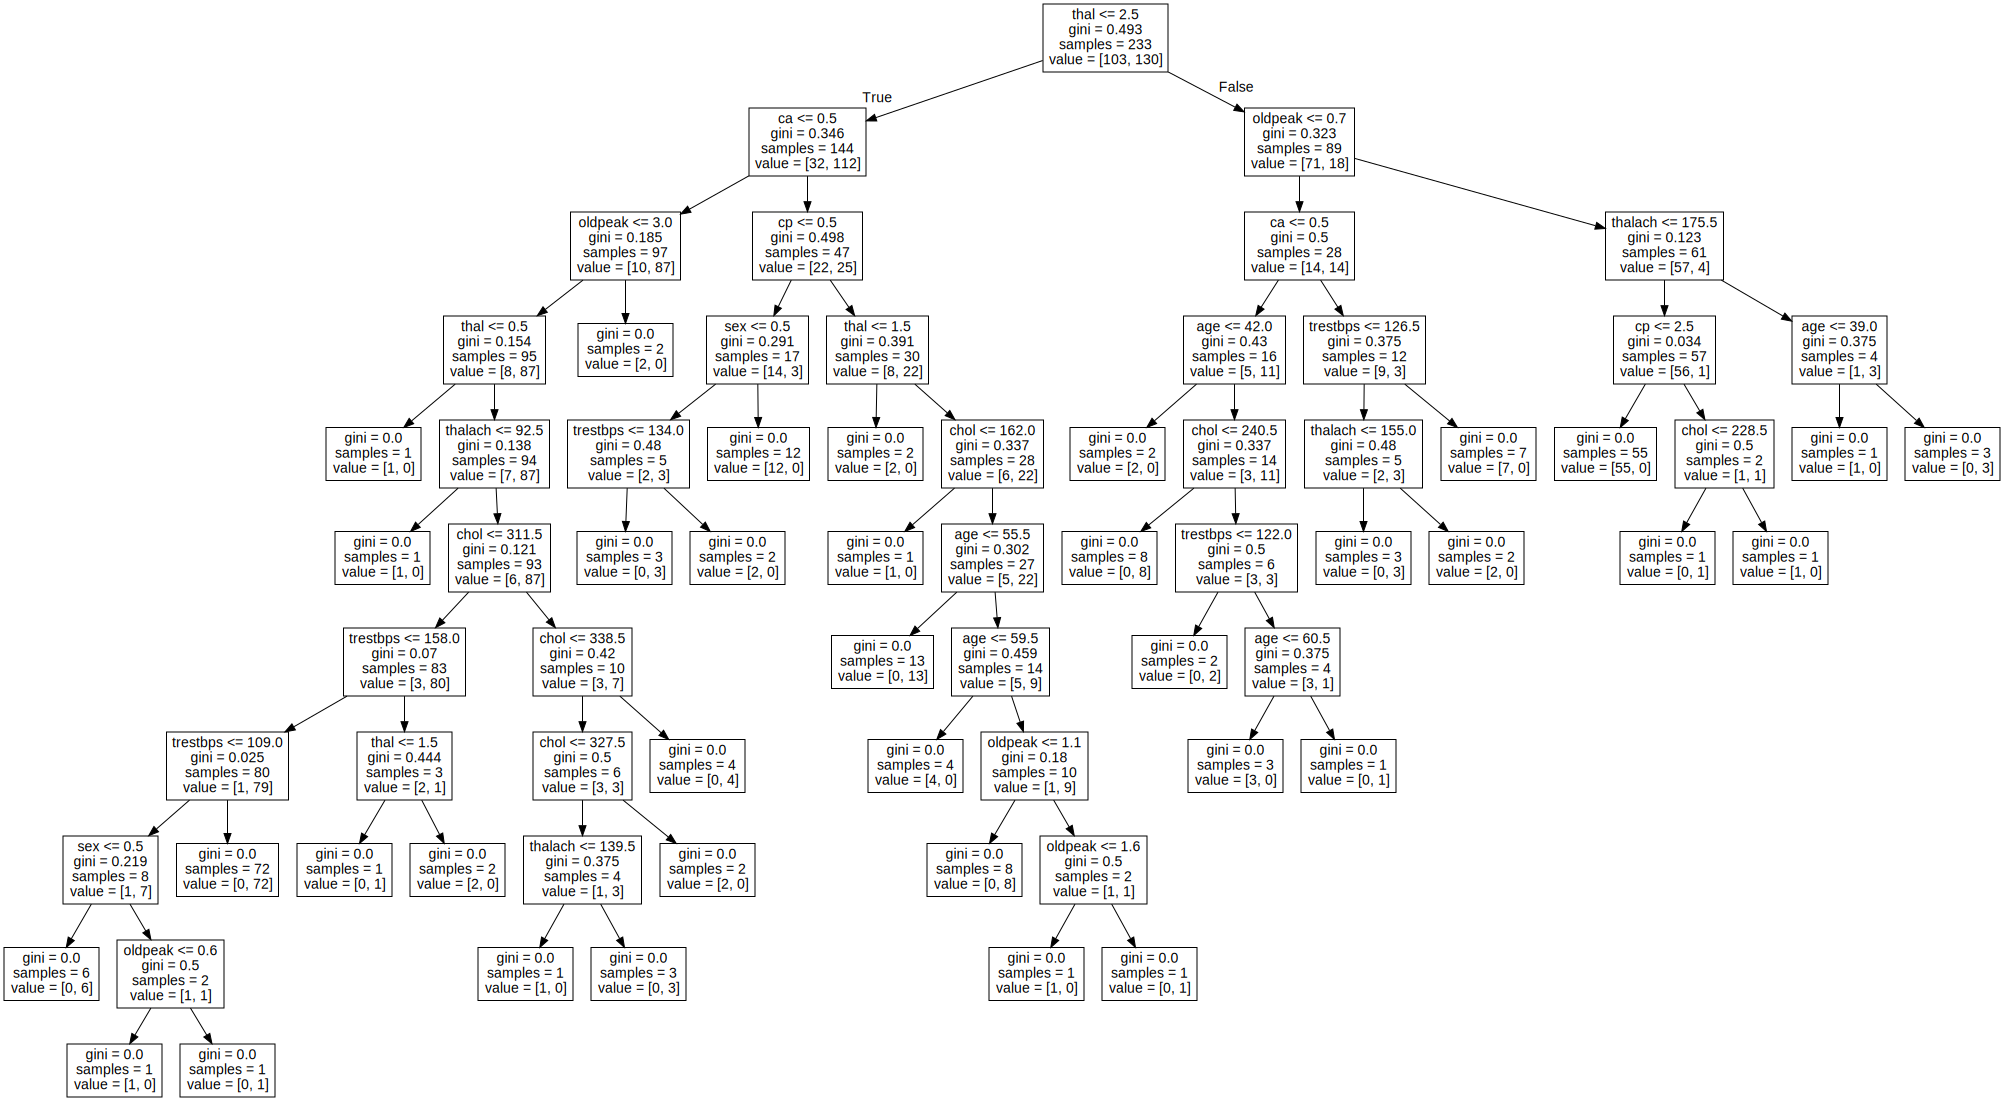

In [9]:
dot=export_graphviz(model,feature_names=x.columns)
gorsel=graphviz.Source(dot)
gorsel

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
forest=RandomForestClassifier()
model=forest.fit(x,y)
model.score(x,y)

1.0

In [12]:
forest=RandomForestClassifier(n_estimators=400,max_depth=4)
model=forest.fit(x_train,y_train)
model.score(x_test,y_test)

0.8142857142857143

In [13]:
import xgboost as xgb

In [14]:
df=pd.read_csv('/kaggle/input/heart-attack/Heart Attack Data Set.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [15]:
df['output']=df['target']

In [16]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1


In [17]:
y=df['output']
x=df.drop(columns=['output'])

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.70)

In [19]:
dt=DecisionTreeClassifier()
model=dt.fit(x,y)
model.score(x,y)

1.0

In [20]:
dt=DecisionTreeClassifier()
model=dt.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [21]:
rf=RandomForestClassifier()
model=rf.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [22]:
rf=xgb.XGBClassifier()
model=rf.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [23]:
df.shape

(303, 15)

In [24]:
insan=df.sample().drop("output",axis=1).values

In [25]:
model.predict(insan)

array([1])